<a href="https://colab.research.google.com/github/irenechau31/PYTHON/blob/main/Stock_Portfolio_Analyzer_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import argparse
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import sys

Total Portfolio Value: $0.00


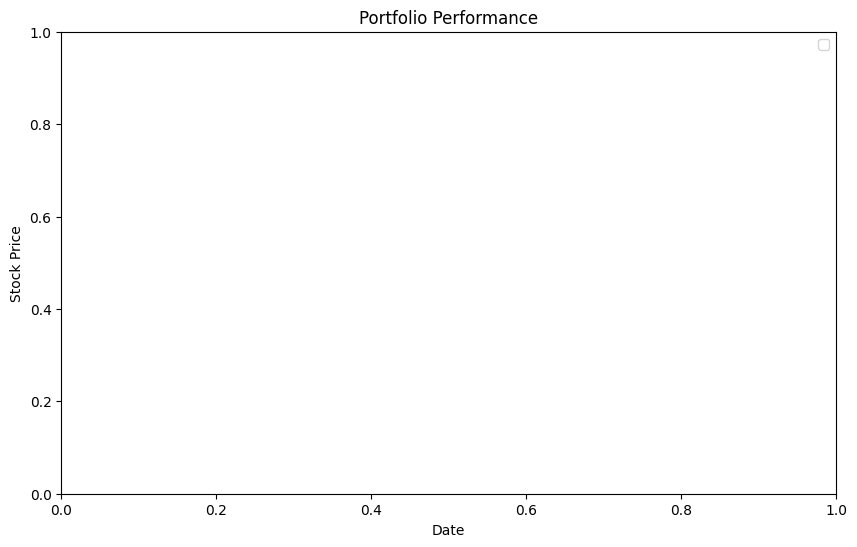

In [5]:


class StockPortfolioAnalyzer:
    def __init__(self):
        self.portfolio = pd.DataFrame(columns=['Ticker', 'Shares', 'Purchase Price'])

    def add_stock_to_portfolio(self, ticker, shares, purchase_price):
        self.portfolio = self.portfolio.append({
            'Ticker': ticker,
            'Shares': shares,
            'Purchase Price': purchase_price
        }, ignore_index=True)

    def fetch_stock_data(self, ticker):
        stock_data = yf.download(ticker, start="2020-01-01", end="2023-01-01")
        return stock_data['Adj Close']

    def calculate_portfolio_value(self):
        total_value = 0
        for index, stock in self.portfolio.iterrows():
            ticker = stock['Ticker']
            shares = stock['Shares']
            purchase_price = stock['Purchase Price']

            stock_data = self.fetch_stock_data(ticker)
            current_price = stock_data.iloc[-1]

            stock_value = current_price * shares
            total_value += stock_value

        return total_value

    def plot_portfolio_performance(self):
        plt.figure(figsize=(10, 6))
        for index, stock in self.portfolio.iterrows():
            ticker = stock['Ticker']
            stock_data = self.fetch_stock_data(ticker)
            plt.plot(stock_data.index, stock_data, label=ticker)

        plt.title('Portfolio Performance')
        plt.xlabel('Date')
        plt.ylabel('Stock Price')
        plt.legend()
        plt.show()

def main():
    parser = argparse.ArgumentParser(description='Stock Portfolio Analyzer')
    parser.add_argument('--add', action='store_true', help='Add a stock to the portfolio')
    parser.add_argument('--ticker', type=str, help='Stock ticker')
    parser.add_argument('--shares', type=int, help='Number of shares')
    parser.add_argument('--price', type=float, help='Purchase price')

    # Check if running in a Jupyter notebook environment
    if 'ipykernel' in sys.modules:
        args = parser.parse_args(args=[])
    else:
        args = parser.parse_args()

    portfolio_analyzer = StockPortfolioAnalyzer()

    if args.add:
        if not args.ticker or not args.shares or not args.price:
            print("Please provide --ticker, --shares, and --price for adding a stock.")
            return

        portfolio_analyzer.add_stock_to_portfolio(args.ticker, args.shares, args.price)
        print(f"{args.ticker} added to the portfolio.")

    # Calculate and display portfolio value
    portfolio_value = portfolio_analyzer.calculate_portfolio_value()
    print(f"Total Portfolio Value: ${portfolio_value:.2f}")

    # Plot portfolio performance
    portfolio_analyzer.plot_portfolio_performance()

if __name__ == '__main__':
    main()